# Supervised Learning with scikit-learn


In [4]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [7]:
churn_df = pd.read_csv('resources/telecom_churn_clean.csv')

## Binary Classification
- two types of supervised learning
    - classification
        - used to predict a target variable that has only two labels, typically represented with a zero or a one
    - regression

### k-Nearest Neigbhors: Fit
- classification model
- target "churn", needs to be single column with same number of observations as feature data.
- "account_length" and "customer_service_calls" are treated as features because account length indicates customer loyalty, and frequent customer service calls may signal dissatisfaction, both of which can be good predictors of churn.

In [8]:
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Predict
- with fitted KNN classifier, one can use it to predict the label of new data points (X_new)
- use classifier to predict the labels of a set of new data points

In [10]:
X_new = np.array([[ 30. ,  17.5], [107. ,  24.1], [213. ,  10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))


Predictions: [0 1 0]


### Train/test split + computing accuracy
-numpy arrarys containing features as X and target variables as Y


In [11]:
# function is essential for splitting dataset into training and test sets
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
# Parameters test_size and random state ensure that 20% of the data is reserved for testing and the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


### Overfitting and underfitting
- aim is to produce a model that can interpret relationship between features and target variable, as well as generalize well when exposed to new observations

In [14]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)

	# Fit the model
	knn.fit(X_train, y_train)

	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.8885971492873218, np.int64(3): 0.8994748687171793, np.int64(4): 0.8750937734433608, np.int64(5): 0.878469617404351, np.int64(6): 0.8660915228807202, np.int64(7): 0.8705926481620405, np.int64(8): 0.8615903975993998, np.int64(9): 0.86384096024006, np.int64(10): 0.858589647411853, np.int64(11): 0.8604651162790697, np.int64(12): 0.8574643660915229} 
 {np.int64(1): 0.7856071964017991, np.int64(2): 0.8470764617691154, np.int64(3): 0.8320839580209896, np.int64(4): 0.856071964017991, np.int64(5): 0.8545727136431784, np.int64(6): 0.8590704647676162, np.int64(7): 0.8605697151424287, np.int64(8): 0.8620689655172413, np.int64(9): 0.863568215892054, np.int64(10): 0.8605697151424287, np.int64(11): 0.8605697151424287, np.int64(12): 0.8605697151424287}


### Visualizing model complexity
- already have calculated the accuary of the KNN model on the training and test sets using various values of "n_neighbors"
- can create a model complexity curve to visualize how performance changes as the model becomes less complex


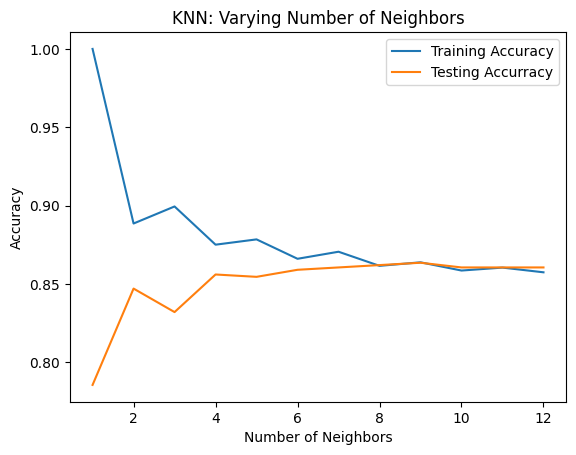

In [18]:
import matplotlib.pyplot as plt
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(),  label="Testing Accurracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()